In [10]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv("C:/Users/moort/GUVI-PROJECTS/ML_Flow/FAANG .csv")
drop_col = ['Revenue', 'Gross Profit', 'Operating Income', 'Total Assets', 'Total Equity','Trailing Twelve Months (TTM) Revenue','Trailing Twelve Months (TTM) EBITDA','Trailing Twelve Months (TTM) Earnings','Cash Ratio']
data = data.drop(columns=drop_col)
data['Date'] = pd.to_datetime(data['Date'])
df_Netflix = data[data['Company']=='Netflix']

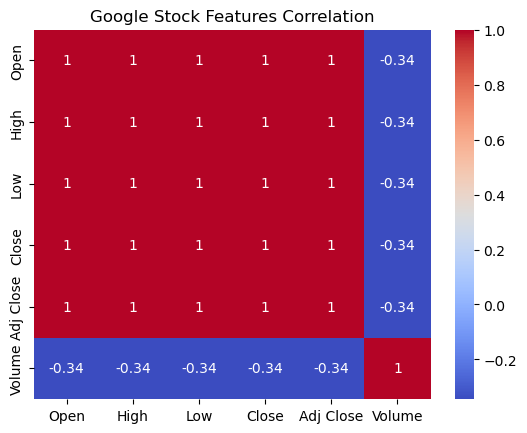

In [4]:
df_Net = df_Netflix[['Open','High','Low','Close','Adj Close','Volume']]
corr_mat = df_Net.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
plt.title("Google Stock Features Correlation")
plt.show()

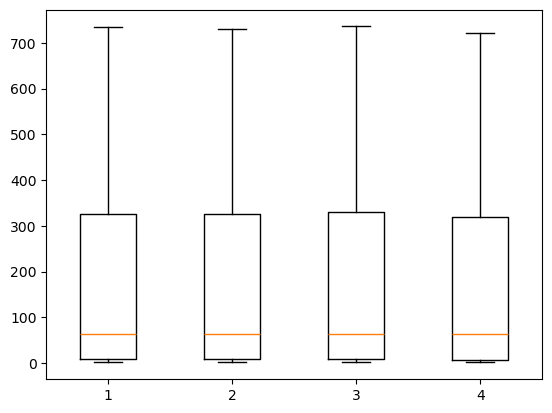

In [5]:
plt.boxplot(df_Netflix[['Open','Close','High','Low']])
plt.show()

Text(0.5, 1.0, 'Close Distribution')

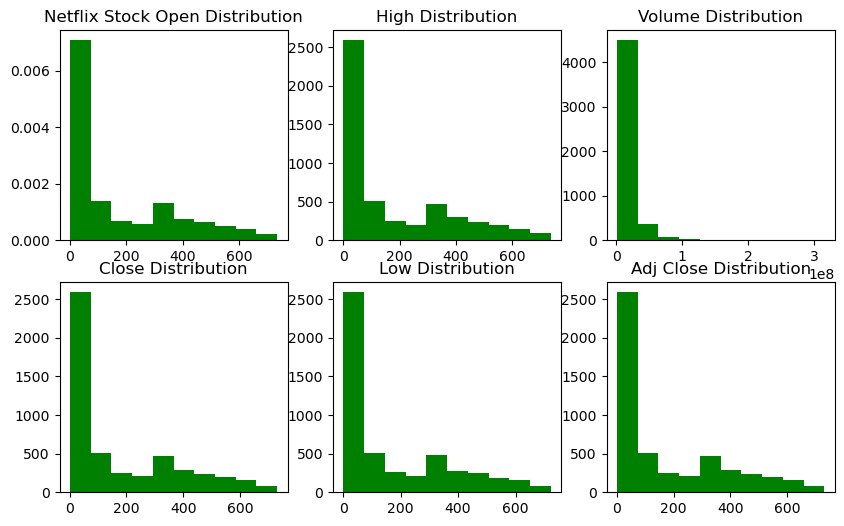

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(10,6))

ax[0,0].hist(df_Netflix['Open'], bins=10, color='green', density=True)
ax[0,0].set_title("Netflix Stock Open Distribution")

ax[0,1].hist(df_Netflix['High'], bins=10, color='green')
ax[0,1].set_title("High Distribution")

ax[0,2].hist(df_Netflix['Volume'], bins=10, color='green')
ax[0,2].set_title("Volume Distribution")

ax[1,2].hist(df_Netflix['Adj Close'], bins=10, color='green')
ax[1,2].set_title("Adj Close Distribution")

ax[1,1].hist(df_Netflix['Low'], bins=10, color='green')
ax[1,1].set_title("Low Distribution")

ax[1,0].hist(df_Netflix['Close'], bins=10, color='green')
ax[1,0].set_title("Close Distribution")

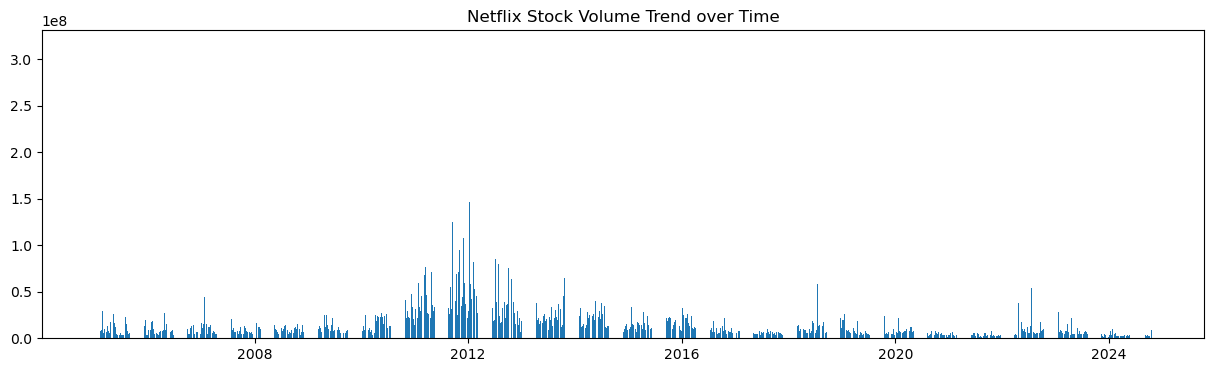

In [15]:
plt.figure(figsize=(15,4))
plt.bar(df_Netflix['Date'], df_Netflix['Volume'])
plt.title("Netflix Stock Volume Trend over Time")
plt.show()

Text(0.5, 1.0, 'Adjust Close Trend')

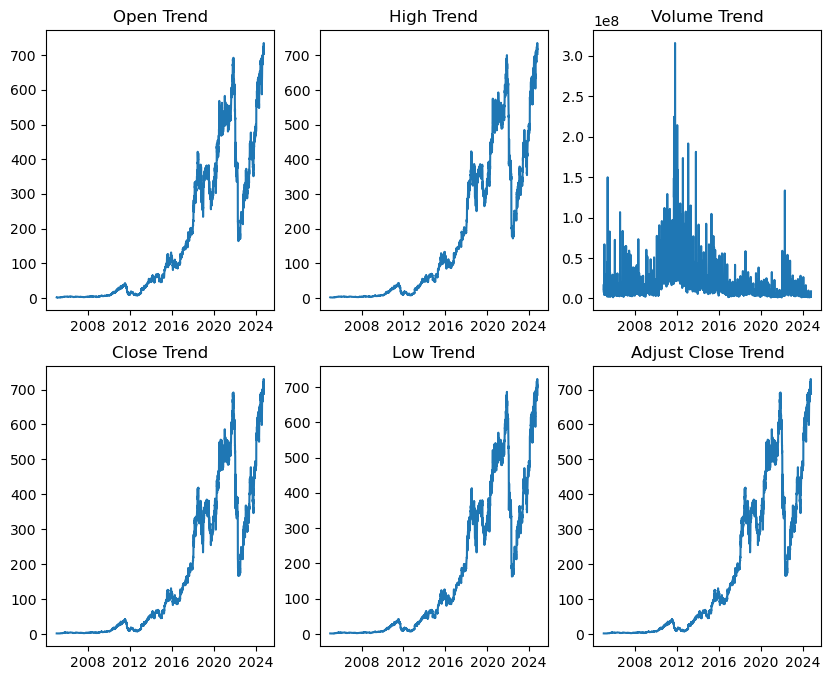

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(10,8))

ax[0,0].plot(df_Netflix['Date'], df_Netflix['Open'])
ax[0,0].set_title("Open Trend")

ax[0,1].plot(df_Netflix['Date'], df_Netflix['High'])
ax[0,1].set_title("High Trend")

ax[0,2].plot(df_Netflix['Date'], df_Netflix['Volume'])
ax[0,2].set_title("Volume Trend")


ax[1,0].plot(df_Netflix['Date'], df_Netflix['Close'])
ax[1,0].set_title("Close Trend")

ax[1,1].plot(df_Netflix['Date'], df_Netflix['Low'])
ax[1,1].set_title("Low Trend")

ax[1,2].plot(df_Netflix['Date'], df_Netflix['Adj Close'])
ax[1,2].set_title("Adjust Close Trend")

In [6]:
X = df_Netflix[['Open','High','Low','Adj Close']]
y = df_Netflix['Close']

In [7]:
X_train_size = int(len(X) * 0.8)
X_train_data = X[:X_train_size]
X_test_data = X[X_train_size:]
print("X_train length: ",len(X_train_data))
print("X_test length: ",len(X_test_data))

y_train_size = int(len(y) * 0.8)
y_train_data = y[:y_train_size]
y_test_data = y[y_train_size:]
print("y_train length: ",len(y_train_data))
print("y_test length: ",len(y_test_data))

X_train length:  3985
X_test length:  997
y_train length:  3985
y_test length:  997


In [8]:
LR_mdl_net = LinearRegression()
LR_mdl_net.fit(X_train_data, y_train_data)
y_pred = LR_mdl_net.predict(X_test_data)
net_score = LR_mdl_net.score(X_test_data, y_test_data)
net_mae = mean_absolute_error(y_test_data, y_pred)
net_mse = mean_squared_error(y_test_data, y_pred)
net_rmse = root_mean_squared_error(y_test_data, y_pred)
net_r2 = r2_score(y_test_data, y_pred)
print("netflix Stock Linear Regression:")
print(f"Score Value :{net_score}")
print(f"Mean Absolute Error_MAE:{net_mae}")
print(f"Mean Squared Error_MSE:{net_mse}")
print(f"Root Mean Squared Error_RMSE:{net_rmse}")
print(f"R-Squared_ R2:{net_r2}")

netflix Stock Linear Regression:
Score Value :1.0
Mean Absolute Error_MAE:5.3964188517306704e-14
Mean Squared Error_MSE:4.5980225601006454e-27
Root Mean Squared Error_RMSE:6.780872038389048e-14
R-Squared_ R2:1.0


In [11]:
DT_mdl_net = tree.DecisionTreeRegressor()
DT_mdl_net.fit(X_train_data, y_train_data)
y_pred_dt = DT_mdl_net.predict(X_test_data)

dt_score_net = DT_mdl_net.score(X_test_data, y_test_data)
dt_mae_net = mean_absolute_error(y_test_data, y_pred_dt)
dt_mse_net = mean_squared_error(y_test_data, y_pred_dt)
dt_rmse_net = root_mean_squared_error(y_test_data, y_pred_dt)
dt_r2_net = r2_score(y_test_data, y_pred_dt)
print("Netflix Stock DecisionTree Regression:")
print(f"Score Value :{dt_score_net}")
print(f"Mean Absolute Error_MAE:{dt_mae_net}")
print(f"Mean Squared Error_MSE:{dt_mse_net}")
print(f"Root Mean Squared Error_RMSE:{dt_rmse_net}")
print(f"R-Squared_ R2:{dt_r2_net}")

Netflix Stock DecisionTree Regression:
Score Value :0.8994454726423545
Mean Absolute Error_MAE:22.209150994182536
Mean Squared Error_MSE:2169.964321708056
Root Mean Squared Error_RMSE:46.58287584196639
R-Squared_ R2:0.8994454726423545


In [12]:
RF_mdl_net = RandomForestRegressor(n_estimators=100)
RF_mdl_net.fit(X_train_data, y_train_data)
y_pred_rf = RF_mdl_net.predict(X_test_data)

rf_score_net = RF_mdl_net.score(X_test_data, y_test_data)
rf_mae_net = mean_absolute_error(y_test_data, y_pred_dt)
rf_mse_net = mean_squared_error(y_test_data, y_pred_dt)
rf_rmse_net = root_mean_squared_error(y_test_data, y_pred_dt)
rf_r2_net = r2_score(y_test_data, y_pred_dt)
print("Netflix Stock RandomForest Regression:")
print(f"Score Value :{rf_score_net}")
print(f"Mean Absolute Error_MAE:{rf_mae_net}")
print(f"Mean Squared Error_MSE:{rf_mse_net}")
print(f"Root Mean Squared Error_RMSE:{rf_rmse_net}")
print(f"R-Squared_ R2:{rf_r2_net}")

Netflix Stock RandomForest Regression:
Score Value :0.8936287483550878
Mean Absolute Error_MAE:22.209150994182536
Mean Squared Error_MSE:2169.964321708056
Root Mean Squared Error_RMSE:46.58287584196639
R-Squared_ R2:0.8994454726423545


In [13]:
GB_mdl_net = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0)
GB_mdl_net.fit(X_train_data, y_train_data)
y_pred_gb = GB_mdl_net.predict(X_test_data)

gb_score_net = GB_mdl_net.score(X_test_data, y_test_data)
gb_mae_net = mean_absolute_error(y_test_data, y_pred_gb)
gb_mse_net = mean_squared_error(y_test_data, y_pred_gb)
gb_rmse_net = root_mean_squared_error(y_test_data, y_pred_gb)
gb_r2_net = r2_score(y_test_data, y_pred_gb)
print("Netflix Stocks GradientBoosting Regression:")
print(f"Score Value :{gb_score_net}")
print(f"Mean Absolute Error_MAE:{gb_mae_net}")
print(f"Mean Squared Error_MSE:{gb_mse_net}")
print(f"Root Mean Squared Error_RMSE:{gb_rmse_net}")
print(f"R-Squared_ R2:{gb_r2_net}")


Netflix Stocks GradientBoosting Regression:
Score Value :0.9005662843400226
Mean Absolute Error_MAE:23.075177381025902
Mean Squared Error_MSE:2145.7772317857675
Root Mean Squared Error_RMSE:46.322534816067304
R-Squared_ R2:0.9005662843400226
